In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rc
import ensemble_class as ens

font = {'family':'sans-serif', 'size'   : 18}

rc('font', **font)

In [2]:
def make_unit(value, param_dict, param):
    unit_value = (value - param_dict[param][1])/(param_dict[param][2] - param_dict[param][1])
    return unit_value

def params_unit(value, param_dict):
    unit_params = np.empty((6))
    for i,key in enumerate(['qv_bl','inv','delt','delq','na','baut']):  # needs to be this order
        unit_value = make_unit(value[i], param_dict, key)
        unit_params[i] = unit_value
    return unit_params

def design_unit(design, param_dict):
    unit_design = np.empty((np.shape(design)))
    for j,member in enumerate(design):
        unit_params = params_unit(member, param_dict)
        unit_design[j] = unit_params
    return unit_design
    
def create_plot(key, a_quarts, fig_single, fig=None, ax=None, title=None):
    if fig_single:
        fig, ax = plt.subplots(figsize=(8,6))
        title=key
        
    unit_names=['$BL~q_{v}$', '$Inv$', r'$\Delta~\theta$', '$\Delta~q_{v}$', '$N_{a}$', '$b_{aut}$']
    ax.plot(unit_names, [0.25]*len(unit_names),alpha=a_quarts, color="black")
    ax.plot(unit_names, [0.5]*len(unit_names),alpha=a_quarts, color="black")
    ax.plot(unit_names, [0.75]*len(unit_names),alpha=a_quarts, color="black")
    
    ax.set_xlabel("Parameters")
    ax.set_ylabel("Unit value")
    ax.set_yticks([0,0.25,0.5,0.75,1])
    ax.set_ylim((0,1))
    ax.set_title(title)
    
    plt.rc('xtick', labelsize='large')
    plt.rc('ytick', labelsize='medium')
    return fig, ax

def plot_values(fig, ax, unit_values):
    dots = []
    for name, values, col in zip(['$BL~q_{v}$', '$Inv$', r'$\Delta~\theta$', '$\Delta~q_{v}$', '$N_{a}$', '$b_{aut}$'], 
                                 unit_values, 
                                 ['C0', 'C1', 'C2', 'C3','C4','C5']):
        dot = ax.scatter(name, values, s=250, c=col)
        dots.append(dot)
        
    lgd = ax.legend(dots, ["$7 < BL~q_{v} < 11$", "$500 < Inversion < 1300$", "$2 < \Delta~\theta < 21$", "$-7 < \Delta~q_{v} < -1$", 
                                "$10 < N_{a} < 500$", "$-2.3 < b_{aut} < 1.3$"], loc = (1.05, 0.45))
    return fig, ax, dots, lgd

def design_and_plot(design, design_name, param_dict, figname, fig_single, fig=None, ax=None, title=None):
    array_unit_values = design_unit(design, param_dict)
    
    for i, element_unit_values in enumerate(array_unit_values):
        fig, ax = create_plot(f'{design_name}{i}', 0.2, fig_single, fig, ax, title)
        fig, ax, dots, lgd = plot_values(fig, ax, element_unit_values)
        
        if fig_single:
            fig.savefig(figname.format(f'{design_name}{i}'), bbox_extra_artists=(lgd,), bbox_inches='tight')
            plt.close()
    if not fig_single:
        fig.savefig(figname, bbox_extra_artists=(lgd,), bbox_inches='tight')
    return None

def main(path, design_name, param_dict, figname):
    design = np.loadtxt(path, delimiter=',', skiprows=1)
    design_and_plot(design, design_name, param_dict, figname, True)
    return None

In [3]:
def find_sc_init(path, design_name):
    design = np.loadtxt(path, delimiter=',', skiprows=1)

    cf80=[]
    for i in range(len(design)):
        if i not in [20,25,28]:
            cf = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_{design_name}{i}_cloud_frac.csv", delimiter=',', skiprows=1)
            if cf[1] > 0.8:
                cf80.append(i)
    
    sc_init_design = np.take(design, cf80, 0)
    return sc_init_design

def find_no_sc_init(path, design_name):
    design = np.loadtxt(path, delimiter=',', skiprows=1)

    cf0=[]
    for i in range(len(design)):
        if i not in [20,25,28]:
            cf = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_{design_name}{i}_cloud_frac.csv", delimiter=',', skiprows=1)
            if cf[1] == 0:
                cf0.append(i)
    
    no_sc_init_design = np.take(design, cf0, 0)
    return no_sc_init_design

def find_low_sc_init(path, design_name):
    design = np.loadtxt(path, delimiter=',', skiprows=1)

    cf_low=[]
    for i in range(len(design)):
        if i not in [20,25,28]:
            cf = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_{design_name}{i}_cloud_frac.csv", delimiter=',', skiprows=1)
            if 0 < cf[1] < 0.2:
                cf_low.append(i)
    
    low_sc_init_design = np.take(design, cf_low, 0)
    return low_sc_init_design

def find_sc_1stnight(path, design_name):
    design = np.loadtxt(path, delimiter=',', skiprows=1)

    cf_low=[]
    for i in range(len(design)):
        if i not in [20,25,28]:
            cf = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_{design_name}{i}_cloud_frac.csv", delimiter=',', skiprows=1)
            if cf[10] > 0.8:
                cf_low.append(i)
    
    sc_1stnight_design = np.take(design, cf_low, 0)
    return sc_1stnight_design

def find_no_sc_init_sc_1stnight(path, design_name):
    design = np.loadtxt(path, delimiter=',', skiprows=1)

    cf_keep=[]
    for i in range(len(design)):
        if i not in [20,25,28]:
            cf = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_{design_name}{i}_cloud_frac.csv", delimiter=',', skiprows=1)
            if cf[1] < 0.2 and cf[10] > 0.8:
                cf_keep.append(i)
    
    no_sc_init_sc_1stnight_design = np.take(design, cf_keep, 0)
    return no_sc_init_sc_1stnight_design

def find_sc_decrease(path, design_name):
    design = np.loadtxt(path, delimiter=',', skiprows=1)

    cf_keep=[]
    for i in range(len(design)):
        if i not in [20,25,28]:
            cf = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_{design_name}{i}_cloud_frac.csv", delimiter=',', skiprows=1)
            if cf[1] > 0.98 and cf[-1] < 0.55:
                cf_keep.append(i)
    
    design_keep = np.take(design, cf_keep, 0)
    return design_keep

def find_sc_decrease_sc1stnight(path, design_name):
    design = np.loadtxt(path, delimiter=',', skiprows=1)

    cf_keep=[]
    for i in range(len(design)):
        if i not in [20,25,28]:
            cf = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_{design_name}{i}_cloud_frac.csv", delimiter=',', skiprows=1)
            if cf[10] > 0.8 and cf[-1] < 0.55:
                cf_keep.append(i)
    
    design_keep = np.take(design, cf_keep, 0)
    return design_keep

# def create_region(path, design_name):
#     design = np.loadtxt(path, delimiter=',', skiprows=1)

#     cf_keep=[]
#     for i in range(len(design)):
#         if i not in [20,25,28]:
#             cf = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_{design_name}{i}_cloud_frac.csv", delimiter=',', skiprows=1)
#             if cf[1] > 0.98 and cf[-1] < 0.55:
#                 cf_keep.append(i)
    
#     design_keep = np.take(design, cf_keep, 0)
#     return design_keep

In [5]:
names=['$BL~q_{v}~(g~kg^{-3})$', '$Inversion~(m)$', r'$\Delta~\theta~(K)$', '$\Delta~q_{v}~(g~kg^{-3})$', '$BL~accum.~(cm^{-3})$', '$b_{aut}~parameter$']
unit_names_long=['$BL~q_{v}$', '$Inversion$', r'$\Delta~\theta$', '$\Delta~q_{v}$', '$BL~accum.$', '$b_{aut}~param$']
unit_names=['$BL~q_{v}$', '$Inv$', r'$\Delta~\theta$', '$\Delta~q_{v}$', '$N_{a}$', '$b_{aut}$']

param_dict={'qv_bl': [unit_names[0], 7, 11], 'inv': [unit_names[1], 500, 1300], 'delt': [unit_names[2], 2, 21], 
            'delq': [unit_names[3], -7, -1], 'na': [unit_names[4], 10, 500], 'baut': [unit_names[5], -2.3, -1.3]}
    
figname = "lh_design/unit_value_plots/{}_unit_values.png"
#main("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", "em", param_dict, figname, fig=None, ax=None)
main("/home/users/eers/sct/lh_design/SCT_ValidationInputsDesign.csv", "val", param_dict, figname)
#main("/home/users/eers/sct/lh_design/SCT_EmulatorOAT.csv", "oat", param_dict, figname, fig=None, ax=None)

In [3]:
FullOriginal = ens.Ensemble("/home/users/eers/sct/lh_design/SCT_ValidationInputsDesign.csv", 
                            "/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv")

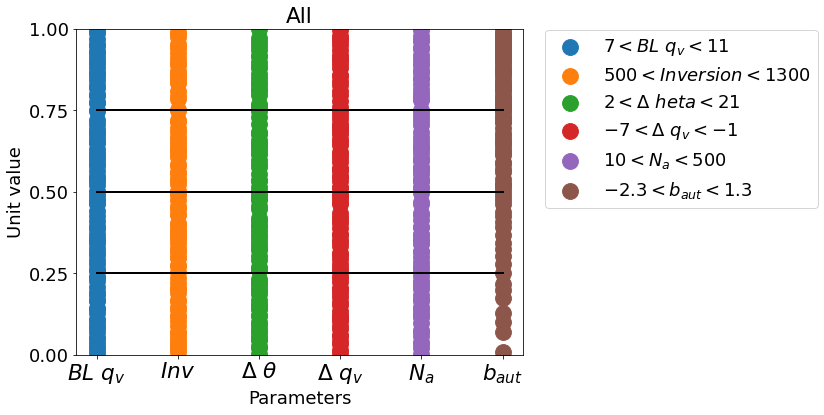

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
figname = "lh_design/param_space_plots/all.png"
design = np.loadtxt("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", delimiter=',', skiprows=1)
design_and_plot(FullOriginal.design, "em", param_dict, figname, False, fig=fig, ax=ax, title="All")


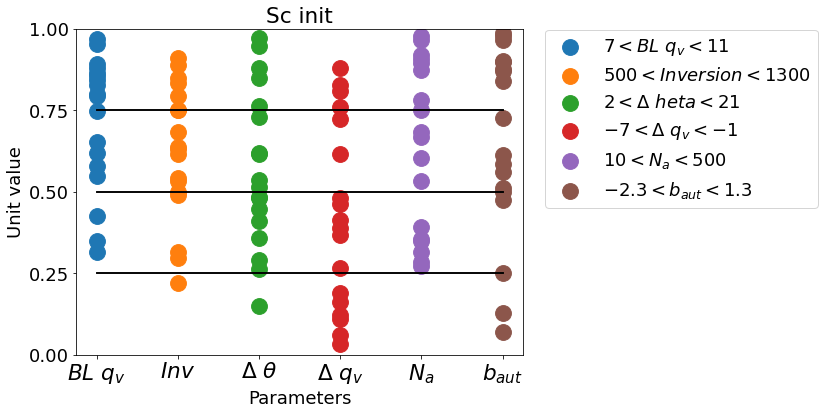

In [103]:
fig, ax = plt.subplots(figsize=(8,6))
figname = "lh_design/param_space_plots/sct_init.png"
design = find_sc_init("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", "em")
design_and_plot(design, "em", param_dict, figname, False, fig=fig, ax=ax, title="Sc init")


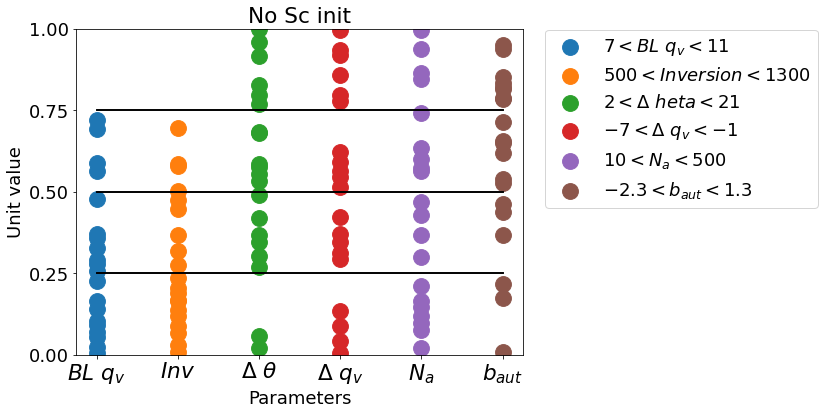

In [111]:
fig, ax = plt.subplots(figsize=(8,6))
figname = "lh_design/param_space_plots/no_sct_init.png"
design = find_no_sc_init("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", "em")
design_and_plot(design, "em", param_dict, figname, False, fig=fig, ax=ax, title="No Sc init")


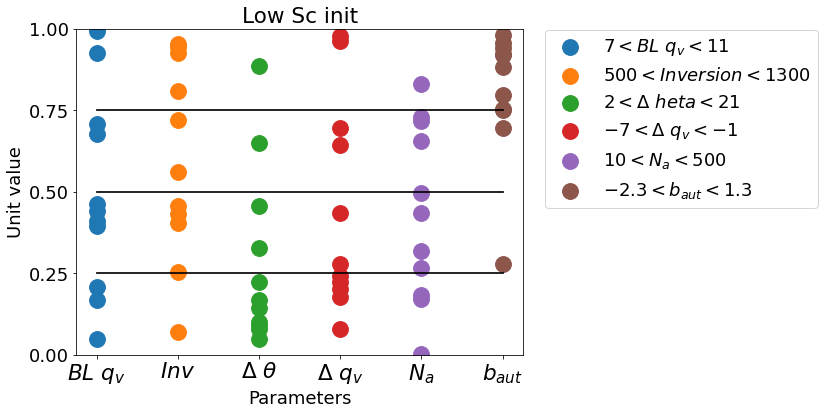

In [112]:
fig, ax = plt.subplots(figsize=(8,6))
figname = "lh_design/param_space_plots/low_sct_init.png"
design = find_low_sc_init("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", "em")
design_and_plot(design, "em", param_dict, figname, False, fig=fig, ax=ax, title="Low Sc init")


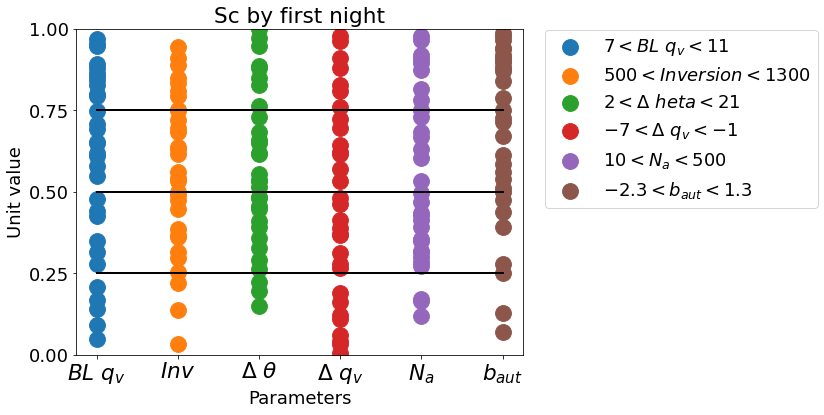

In [115]:
fig, ax = plt.subplots(figsize=(8,6))
figname = "lh_design/param_space_plots/sc_firstnight.png"
design = find_sc_1stnight("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", "em")
design_and_plot(design, "em", param_dict, figname, False, fig=fig, ax=ax, title="Sc by first night")


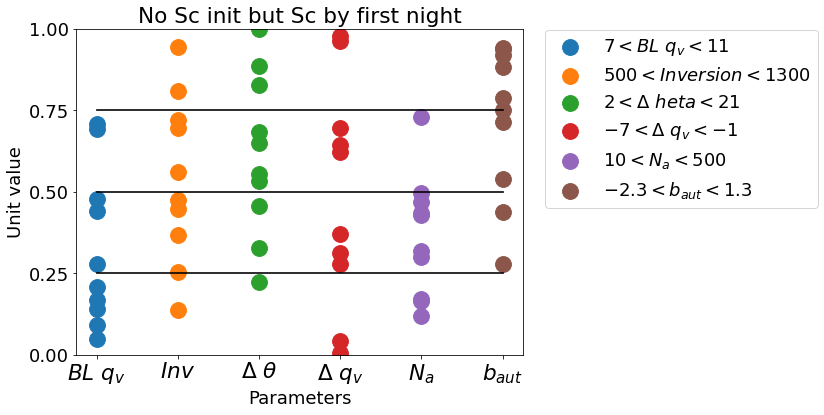

In [118]:
fig, ax = plt.subplots(figsize=(8,6))
figname = "lh_design/param_space_plots/no_sc_init_sc_1stnight.png"
design = find_no_sc_init_sc_1stnight("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", "em")
design_and_plot(design, "em", param_dict, figname, False, fig=fig, ax=ax, title="No Sc init but Sc by first night")


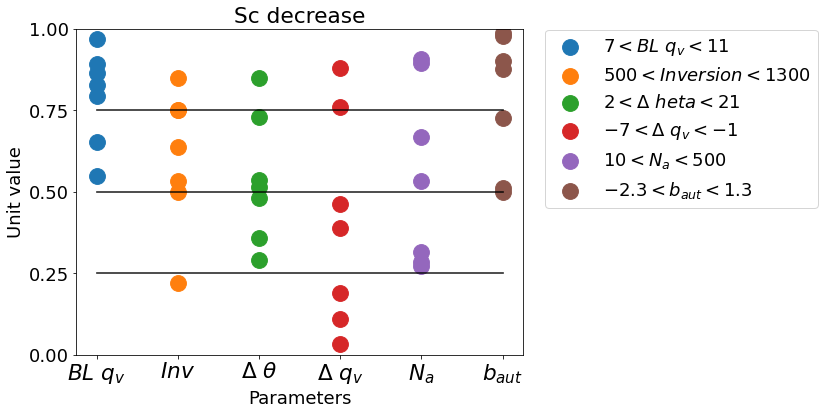

In [123]:
fig, ax = plt.subplots(figsize=(8,6))
figname = "lh_design/param_space_plots/sc_decrease.png"
design = find_sc_decrease("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", "em")
design_and_plot(design, "em", param_dict, figname, False, fig=fig, ax=ax, title="Sc decrease")


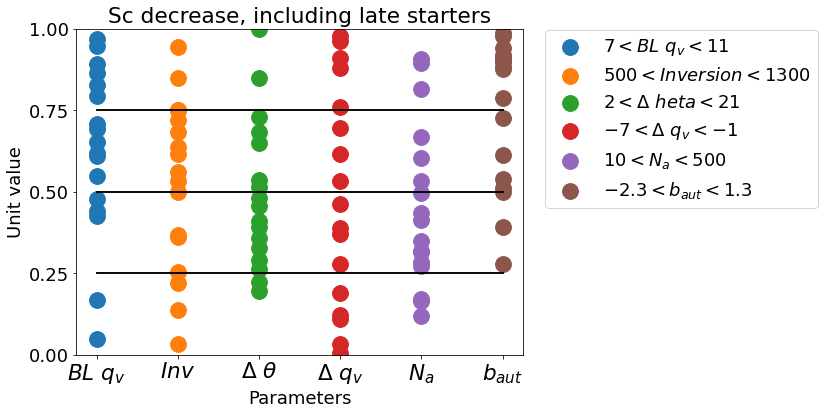

In [125]:
fig, ax = plt.subplots(figsize=(8,6))
figname = "lh_design/param_space_plots/sc_decrease_sc1stnight.png"
design = find_sc_decrease_sc1stnight("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", "em")
design_and_plot(design, "em", param_dict, figname, False, fig=fig, ax=ax, title="Sc decrease, including late starters")


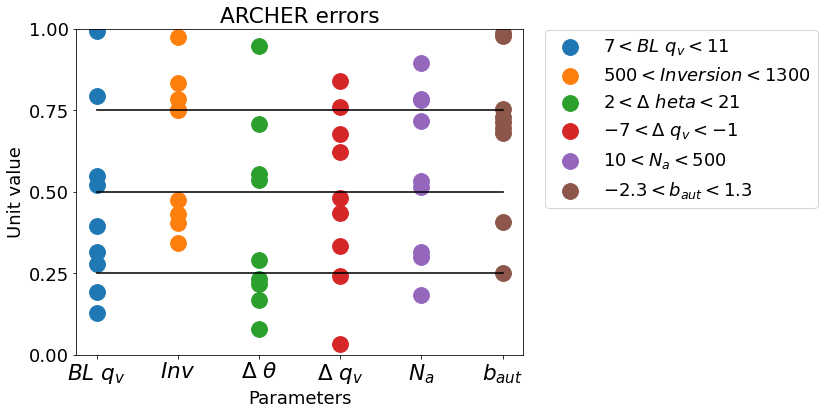

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
figname = "lh_design/param_space_plots/archer_errors.png"
bigger_errors=[10,15,16,25,28,32,33,37,38,43,44,46,55,60]
errors = [4,7,9,10,11,13,14,15,16,23,24,25,26,27,28,29,30,32,33,34,35,37,38,
         40,41,42,43,44,45,46,47,48,49,51,52,53,54,57,60]
OOTs = [9,16,20,28,33,37,44,46,54,]
design = np.take(np.loadtxt("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", delimiter=',', skiprows=1), OOTs, 0)
design_and_plot(design, "em", param_dict, figname, False, fig=fig, ax=ax, title="ARCHER errors")
